In [2]:
import numpy as np
import pylab as pl
import os.path
import pandas as pd
import deorblib

In [13]:
import load_gmat
import gmatpy as gmat

# load script
gmat.LoadScript('gmat/scripts/test0.script')

# change some fields
alt = 350e3 

X = (alt + deorblib.R_earth) / 1000
# a correction of 10 km must be added to get the right velocity...
VY = deorblib.kepler_velocity(alt-10e3) / 1000
print('at altitude = {} km: VX = {} km/s at X = {} km'.format(alt/1000, VY, X))

sc = gmat.GetObject('DefaultSC')
sc.SetField('X', X)
sc.SetField('VY', VY)

# change path of report file
gmat.GetObject('ReportFile1').SetField('Filename', os.path.abspath('report1.txt'))

at altitude = 350.0 km: VX = 7.702746991752088 km/s at X = 6728.1 km


In [14]:
# run script
gmat.RunScript()

True

In [15]:
# load report
results = pd.read_csv('report1.txt', sep=' +', header=0, engine='python')

In [16]:
results

,DefaultSC.A1ModJulian,DefaultSC.Earth.Altitude,DefaultSC.EarthMJ2000Eq.X,DefaultSC.EarthMJ2000Eq.Y,DefaultSC.EarthMJ2000Eq.Z,DefaultSC.ElapsedDays,DefaultSC.ElapsedSecs
0,21545.000000,349.963700,6728.100000,0.000000,0.000000,0.000000,0.000000e+00
1,21545.000695,349.964616,6712.233700,461.801583,-0.000095,0.000694,6.000000e+01
2,21545.001616,349.968602,6642.421129,1070.344393,-0.000473,0.001615,1.395490e+02
3,21545.002645,349.976632,6499.177248,1740.172040,-0.001143,0.002645,2.285131e+02
4,21545.003686,349.988310,6285.872443,2399.055729,-0.001965,0.003686,3.184623e+02
...,...,...,...,...,...,...,...
109869,21657.423614,170.284736,-5646.714484,3316.087083,-0.240741,112.423614,9.713400e+06
109870,21657.424148,170.217917,-5820.478952,3000.494570,-0.230666,112.424148,9.713446e+06
109871,21657.424697,170.149519,-5980.520165,2667.100612,-0.219529,112.424696,9.713494e+06
109872,21657.425327,170.071363,-6140.870815,2273.483932,-0.205742,112.425326,9.713548e+06


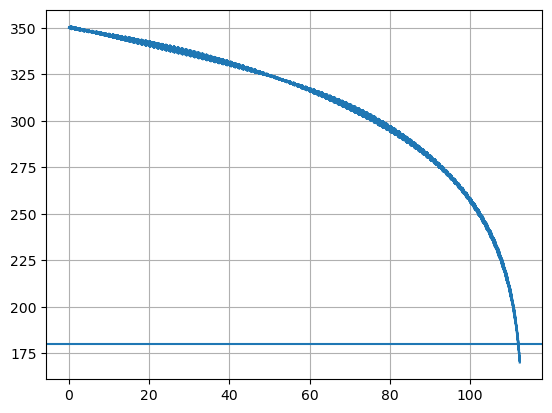

In [17]:
t = results["DefaultSC.ElapsedDays"]
pl.plot(t, results["DefaultSC.Earth.Altitude"])
pl.grid()
pl.axhline(180)